# Fundamental models and tools

An image can be scanned in the form of a matrix image (in English, **bitmap**) by a matrix of colored dots. This matrix has $n$ lines (the height of the image) and $p$ columns (the width). The element $(i, j)$ represents a pixel.

There are several ways to code color. The method accessible with the ***matplotlib.image*** library is the RGB method. Each color is represented by a list with three entries $[r, g, b]$ where $r$, $g$ and $b$ are three reals respectively representing the quantity of red, green and blue contained in the color.

The method of mixing colors is additive synthesis. The mixture of the three colored lights creates the desired color. If $r = g = b = 0$, i.e. no color, the pixel is black. If $r$, $g$ and $b$ have their maximum value, the pixel is white. This maximum value depends on the image and the aspect ratio: it can be 1 or 255.

If the maximum value is $1$, then $[1,0,0]$ is pure red, $[0,1,1]$ is cyan (complementary to red), and so on. 
Colors with the same proportions of red, green, and blue $[x,x,x]$ are increasingly lighter gray as $x$ increases.
With numpy an image is therefore encoded with a matrix $A$ of dimension $3$. The first dimension represents the number of the line, the second the number of the column and the last the number of the color.


## 1) Load and display Image with numpy
1.1 import ***matplotlib.image*** library.

1.2 Retrieve the image 'baboon.png' from https://homepages.cae.wisc.edu/~ece533/images/baboon.png, and save it in the working directory. 
Using instructions of the ***matplotlib.image*** library, load the image 'babouin.png' so that the image is managed as a numpy array.

1.3 Run ***print(img)*** and check that the colors are coded by 3 floating between 0 and 1. The matplotlib.image library has decoded the file and loaded the image as a numpy array.

1.4 Run ***print(img.shape)***. Interpret the result.

1.5 Run ***plt.imshow(img)***. Interpret the result.

1.6 Since ***img*** is an array, it's easy to manipulate it with numpy methods or with loops. For example, change the image to saturate the red color.


(512, 512, 3)
0.0 1.0


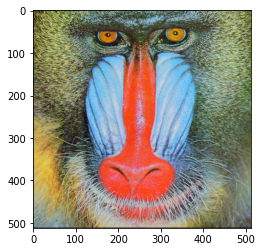

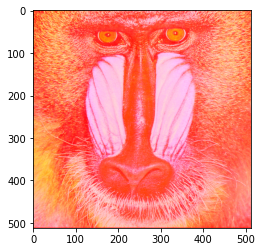

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

img = mpimg.imread('https://homepages.cae.wisc.edu/~ece533/images/baboon.png')
mpimg.imsave('baboon.png', img)
#img = mpimg.imread('baboon.png')
#print(img)

print(img.shape) 

print(img.min(), img.max())
# -----------------------------
plt.imshow(img) 
plt.show()
# -----------------------------
img_red = img
img_red[:, :, 0] = 1
plt.imshow(img_red)
plt.show()

In [ ]:
img[:, :, 1].shape

(512, 512)

### comments:
1.4) Returns a tuple containing $(h, w, 3)$; $h$ and $w$: height and width of the image, $3$: number of additive colors used (Red, Green,Blue). In our case, $(256, 256, 3)$.

1.5) The ***plt.imshow()*** instruction tells matplotlib to interpret that array as a bitmap.

## 2) Negative Image
A negative image is an image whose colors have been inverted compared to the original; for example, red becomes cyan, green becomes magenta, blue becomes yellow... The dark regions become clear, the black becomes white. For this, it is enough to invert the levels of each of the primary colors.

Write the function **Negative()** returning the negative image of the image passed as a parameter.  Do not forget to use ***mpimgimsave(filename, array)***.
Call the function **Negative()** and plot the result.

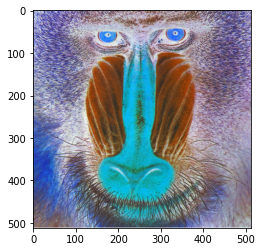

In [ ]:
import numpy as np

def Negative(image_file):
    img = mpimg.imread(image_file)
    #print(img)
    inversed_img = 1 - img[:,:,:3]
    plt.imshow(inversed_img)
    mpimg.imsave("negative_" + image_file, inversed_img)
    return(inversed_img)

img_file = 'baboon.png'
negative_img = Negative(img_file)

plt.imshow(negative_img)

## 3) Decomposition of an image into its components “RGB”

As explained at the beginning, we use here the additive synthesis of colors.
Write the function **Color_Separation()** that returns three images each one corresponds to red, green and blue component respectively, based on the question 1.6 that sets to 0 the components 1 and 2 of the pixels to saturate the red color.

Call the function **Color_Separation()** and plot the result.

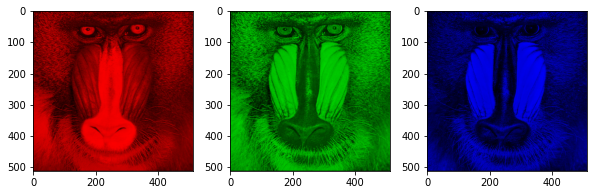

In [ ]:
import numpy as np

def Color_Separation(image_file):
    #Read initial image
    img = mpimg.imread(image_file)
    
    #All images in black
    W,H,_=img.shape
    red_img = np.zeros((W,H,3))
    green_img = np.zeros((W,H,3))
    blue_img = np.zeros((W,H,3))

    red_img[:,:,0] = img[:,:,0]
    green_img[:,:,1] = img[:,:,1]
    blue_img[:,:,2] = img[:,:,2]
    
    #Saving images
    mpimg.imsave("red_" + image_file, red_img)
    mpimg.imsave("green_" + image_file, green_img)
    mpimg.imsave("blue_" + image_file, blue_img)
    
    return(red_img, green_img, blue_img)

# Calling the function Color_Separation
(r, g, b) = Color_Separation("baboon.png")

#Plotting the three images
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(r)
ax2 = fig.add_subplot(3,3,2)
ax2.imshow(g)
ax3 = fig.add_subplot(3,3,3)
ax3.imshow(b)

## 4) From Color image to Grayscale image

4.1 In a grayscale image, the three **R**, **G**, **B** components of each pixel have the same value. Write a function ***Mean_Gray()*** that replace the three levels **R**, **G**, **B** by their mean and return a new image, in grayscale.

(512, 512, 4) (512, 512)


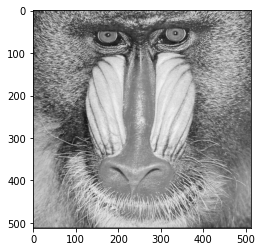

In [ ]:
#4.1 Mean of the three colors red, green and blue
def Mean_Gray(image_file):
    img = mpimg.imread(image_file)
    gray_img = (img[ : , : , 0] + img[ : , : , 1] + img[ : , : , 2])/3
    mpimg.imsave("Meangray_"+image_file, gray_img, cmap="gray")
    
    print(img.shape, gray_img.shape)
    
    return(gray_img)

plt.imshow(Mean_Gray("baboon.png"), cmap='gray') 

4.2 The eye is more sensitive to certain colors than others. Green (pure), for example, looks lighter than blue (pure). To take into account this sensitivity in the transformation of a color image into a grayscale image, we do not generally take the arithmetic mean of the fundamental color intensities, but a weighted mean. The standard formula giving the gray level according to the three components is: Gray = $0.2125$ × **R** + $0.7154$ × **G** + $0.0721$ × **B**.
Write a function ***Bright_Gray()*** returning a new image, in grayscale. The three levels **R**, **G**, **B** of a pixel are equal to the gray level given by the formula above.

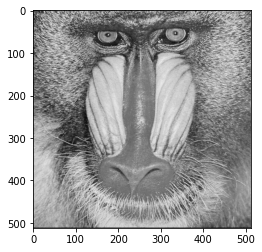

In [ ]:
#4.2 Pixel brightness
def Bright_Gray(image_file, w1 = 0.2125, w2 = 0.7154):
    img = mpimg.imread(image_file)
    imggray = w1 * img[ : , : , 0] + w2 * img[ : , : , 1] + (1-w1-w2) * img[ : , : , 2]
    mpimg.imsave("Brightgray_"+image_file, imggray , cmap="gray")
    return(imggray )

plt.imshow(Bright_Gray("baboon.png"),cmap='gray')

4.3 Now, write a function ***MeanMinMax_Gray()*** that take the mean between the minimum and the maximum of the three components and return a new image in grayscale.

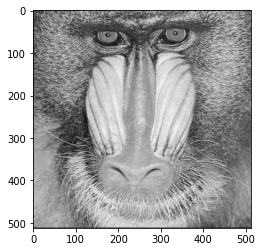

In [ ]:
def Minmax_Gray(image_file):
    img = mpimg.imread(image_file)
    height, width, color = img.shape
    imggray  = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            imggray[i,j] = (max( img[i,j,0], img[i,j,1], img[i,j,2]) + min( img[i,j,0], img[i,j,1], img[i,j,2]))/2
    mpimg.imsave("Minmaxgray_" + image_file, imggray , cmap="gray")
    return(imggray)

plt.imshow(Minmax_Gray("baboon.png"),cmap='gray')

## 5) From Color image to Black and white image : Thresholding

Propose and implement the function BW() that transform the image into black and white binary image. Explain your choice of function BW().

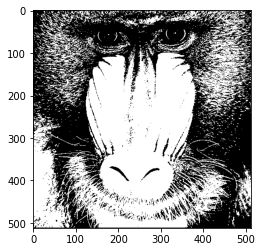

In [ ]:
def BW(image_file, threshold, method):
    img = mpimg.imread(image_file)
    #(height, width, depth) = img.shape
    
    imggray = method(image_file)
    imgBW = (imggray >= threshold)
    mpimg.imsave("BW_" + image_file, imgBW, cmap="gray")
    return(imgBW)


plt.imshow(BW("baboon.png", 0.5, Minmax_Gray ), cmap="gray")


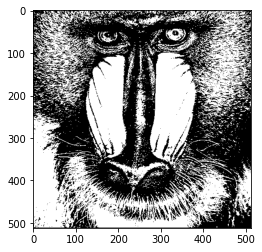

In [ ]:
plt.imshow(BW("baboon.png", 0.5, Bright_Gray ), cmap="gray")

### Comments:
A simple way to turn an image into black and white is to transform the image into a gray level then apply a threshold function. If the gray is greater than a value X then the pixel is turned to white, otherwise it is turned to black. The threshold is to be fixed in advance.

## 6) Improve image contrast

To improve the contrast, we need to apply some function to each of the channels of our original image. There are different functions we can apply:

6.1 Square-root function 
Write a function ***contrast()*** that improve the contrast using a square root function (replace each input level $x$ by $\sqrt{x}$).


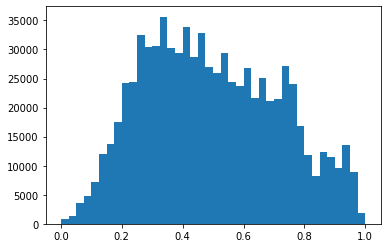

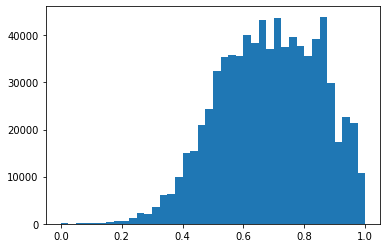

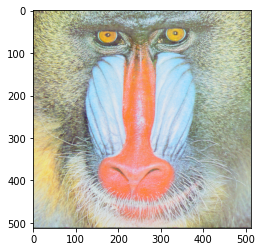

In [ ]:
import matplotlib.image as mpimg
import numpy as np
import math as m
def contrast(image_file):
    img = mpimg.imread(image_file)[:,:,:3]
    
    img_contrast = (img)**0.5
    plt.hist(img.flatten(), bins = 40)
    plt.show()
    plt.hist(img_contrast.flatten(), bins = 40)
    plt.show()
    mpimg.imsave("contrast_" + image_file, img_contrast)
    
    return(img_contrast)

plt.imshow(contrast("baboon.png"))


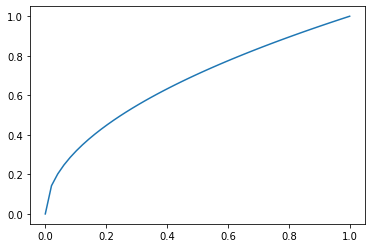

In [ ]:
x = np.linspace(0, 1)
y = np.sqrt(x)
plt.plot(x, y)
plt.show()

6.2 An "$S$" curve (a properly processed piece of $\sin$): $f(x) =\frac 12 +\frac 12\sin(\pi(x-\frac 12))$. Write a function ***contrast_Sinus()*** that uses this function to improve contrast.

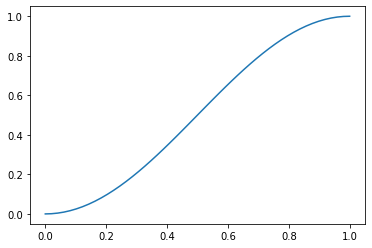

In [ ]:
x = np.linspace(0, 1)
y = 0.5+0.5*np.sin(np.pi*(x-0.5))
plt.plot(x, y)
plt.show()

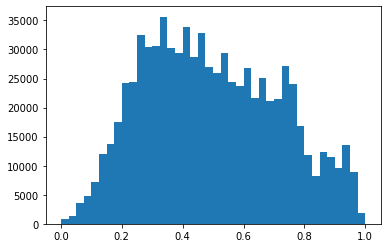

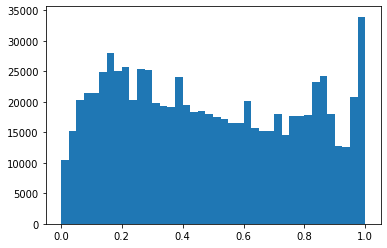

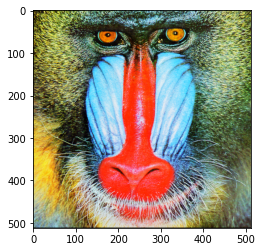

In [ ]:
def contrast_Sinus(image_file):
    
    img = mpimg.imread(image_file)[:,:,:3]
    
    img_contrastSinus = 0.5+0.5*np.sin(np.pi*(img-0.5))
    
    plt.hist(img.flatten(), bins = 40)
    plt.show()
    plt.hist(img_contrastSinus.flatten(), bins = 40)
    plt.show()
    mpimg.imsave("contrastSinus_" + image_file, img_contrastSinus)
    
    return img_contrastSinus

plt.imshow(contrast_Sinus("baboon.png"))

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


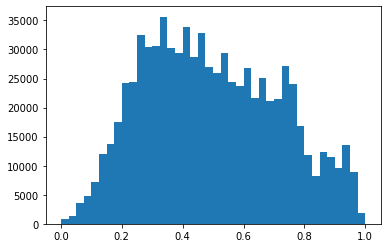

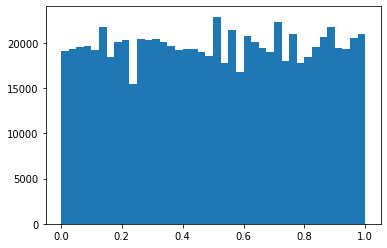

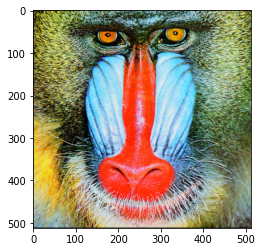

In [ ]:
from skimage import exposure
def contrast_SK(image_file):
    
    img = mpimg.imread(image_file)[:,:,:3]
    
    img_eq = exposure.equalize_hist(img)
    
    plt.hist(img.flatten(), bins = 40)
    plt.show()
    plt.hist(img_eq.flatten(), bins = 40)
    plt.show()
    mpimg.imsave("contrastSK_" + image_file, img_eq)
    
    return img_eq

plt.imshow(contrast_SK("baboon.png"))

In [ ]:
print(0.5+0.5*np.sin(np.pi*(0.2-0.5)))
print(0.5+0.5*np.sin(np.pi*(0.7-0.5)))

0.09549150281252627
0.7938926261462365


## Comments:

An S-shaped curve contrasts your image by increasing the brightness of the light areas and decreasing the brightness of the shadows. The same inverted curve will attenuate the contrast. It tends to exaggerate the differences between the levels.

## 7) Morphological operators with python

Using openCV functions specific to mathematical morphology, write a code to perform the 4 morphological operations (**erosion**, **dilation**, **opening** and **closing**) to the image baboon.png
As kernel, use a matrix of size 3 with help of numpy.  
Display and interpret the result.
Now, perform the different morphological operation with a circular shaped kernel then an elliptical kernel.

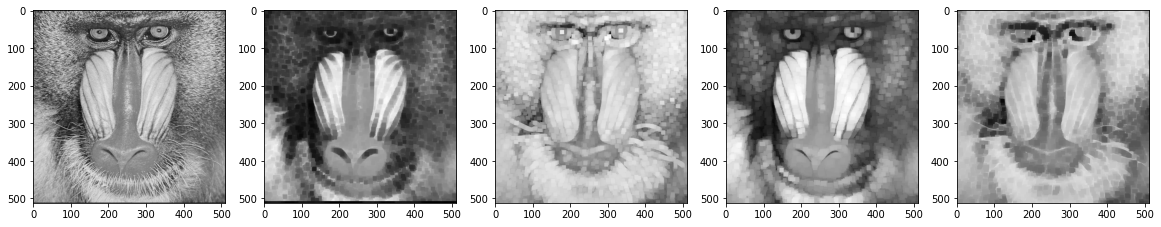

In [ ]:
############################### Rectangular Kernel #######################################

# pip install opencv-python

import cv2 
import numpy as np 

# Use 0 to read image in grayscale mode
image = cv2.imread('baboon.png', 0) 
  
kernel = np.ones((10,10), np.uint8) 
   
erosion = cv2.erode(image, kernel, iterations=1) 
dilation = cv2.dilate(image, kernel, iterations=1) 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

fig = plt.figure(figsize = (20,5))
plt.subplot(151), plt.imshow(image, 'gray')
plt.subplot(152), plt.imshow(erosion,'gray')
plt.subplot(153), plt.imshow(dilation, 'gray')
plt.subplot(154), plt.imshow(opening, 'gray')
plt.subplot(155), plt.imshow(closing, 'gray')
plt.show()

In [ ]:
#from google.colab.patches import cv2_imshow
#cv2_imshow(image) 
#cv2_imshow(erosion) 
#cv2_imshow(dilation) 
#cv2_imshow(opening)
#closing_S = cv2.resize(closing, (300, 300))                    # Resize image 
#cv2_imshow(closing_S) 

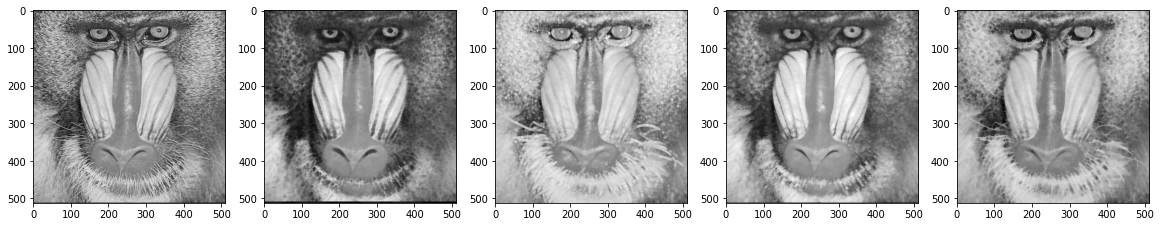

In [ ]:
############################### Cross-shaped Kernel ##########################################
image = cv2.imread('baboon.png', 0) 
  
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
   
erosion = cv2.erode(image, kernel, iterations=1) 
dilation = cv2.dilate(image, kernel, iterations=1) 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  
fig = plt.figure(figsize = (20,5))
plt.subplot(151), plt.imshow(image, 'gray')
plt.subplot(152), plt.imshow(erosion,'gray')
plt.subplot(153), plt.imshow(dilation, 'gray')
plt.subplot(154), plt.imshow(opening, 'gray')
plt.subplot(155), plt.imshow(closing, 'gray')
plt.show()

In [ ]:
#cv2_imshow(image) 
#cv2_imshow(erosion) 
#cv2_imshow(dilation) 
#cv2_imshow(opening)
#closing_S = cv2.resize(closing, (300, 300))                    # Resize image 
#cv2_imshow(closing_S)  

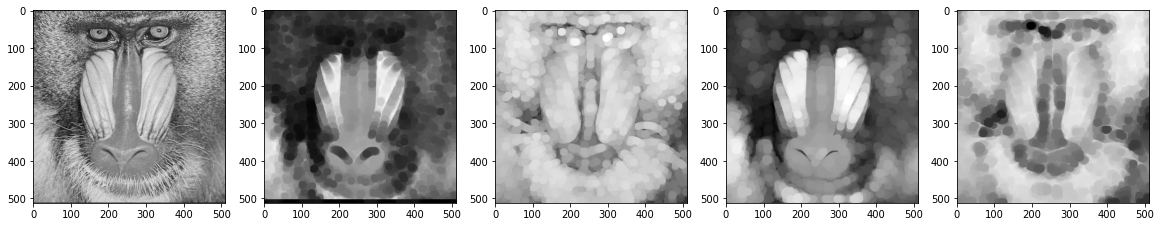

In [ ]:
############################### Elliptical Kernel ############################################
image = cv2.imread('baboon.png', 0) 
  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
   
erosion = cv2.erode(image, kernel, iterations=1) 
dilation = cv2.dilate(image, kernel, iterations=1) 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  
    
fig = plt.figure(figsize = (20,5))
plt.subplot(151), plt.imshow(image, 'gray')
plt.subplot(152), plt.imshow(erosion,'gray')
plt.subplot(153), plt.imshow(dilation, 'gray')
plt.subplot(154), plt.imshow(opening, 'gray')
plt.subplot(155), plt.imshow(closing, 'gray')
plt.show()    
    
#cv2_imshow(image) 
#cv2_imshow(erosion) 
#cv2_imshow(dilation) 
#cv2_imshow(opening)
#closing_S = cv2.resize(closing, (300, 300))                    # Resize image 
#cv2_imshow(closing_S) 